In [37]:
import pandas as pd

In [38]:
data = pd.read_csv("../../Data/2023_smartFarm_AI_hackathon_dataset.csv")
data1 = pd.read_csv("../../Data/2023_smartFarm_AI_hackathon_dataset.csv")
data.head()
data.tail() # 총 데이터 84839

,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
84835,DBSF9969,20180710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,235272.042536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84836,DBSF9969,20180711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,227947.124946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84837,DBSF9969,20180712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,231527.426327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84838,DBSF9969,20180713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,251254.321635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84839,DBSF9969,20180714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84840 entries, 0 to 84839
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   frmDist                    84840 non-null  object 
 1   date                       84840 non-null  int64  
 2   inTp                       84840 non-null  float64
 3   inHd                       84840 non-null  float64
 4   otmsuplyqy                 84840 non-null  float64
 5   acSlrdQy                   84840 non-null  float64
 6   cunt                       84840 non-null  float64
 7   ph                         84840 non-null  float64
 8   outTp                      84840 non-null  float64
 9   outWs                      84840 non-null  float64
 10  daysuplyqy                 84840 non-null  float64
 11  inCo2                      84840 non-null  float64
 12  ec                         84840 non-null  float64
 13  frmYear                    84840 non-null  int

In [40]:
data[['date', 'frmYear', 'frmWeek']]

,date,frmYear,frmWeek
0,20220926,0,0
1,20221001,0,0
2,20221002,0,0
3,20221003,0,0
4,20221004,0,0
...,...,...,...
84835,20180710,0,0
84836,20180711,0,0
84837,20180712,0,0
84838,20180713,0,0


-----

# frmYear에 0 존재

In [41]:
data['frmYear'].value_counts()

frmYear
2018    38100
2017    25080
0       11580
2019    10080
Name: count, dtype: int64

frmYear -> 0년인 데이터가 존재..
> date와 frmYear가 일치하는지 체크 해봐야겠음


In [42]:
## date의 년도와 frmYear과 같은지 확인

date = pd.DataFrame(data['date'].astype(str).str[:4])
date['frmYear'] = data['frmYear']
date['date'] = date['date'].astype(int)
date['YN'] = date['frmYear'] == date['date']

date[date['YN'] == False].value_counts()
# date[date['YN'] == True]






date  frmYear  YN   
2022  0        False    8640
2018  0        False    1980
2019  0        False     720
2017  0        False     240
Name: count, dtype: int64

# [날짜함수] 날짜 데이터와 year 데이터가 일치하지 않을 경우 

In [43]:

# 날짜 데이터와 year 데이터가 일치하지 않을 경우
# df : dataframe 명
# col1 : 날짜 컬럼명 (토마토 데이터에서는 date)
# col2 : 년도 컬럼명 (토마토 데이터에서는 frmYear)
def getYear(df, col1, col2) :
    year = pd.DataFrame(df[col1].astype(str).str[:4].astype(int))
    year.columns = [col1]
    year[col2] = df[col2]
    
    df.loc[df[col2] == 0, col2] = year[col1]

    print(df[col2].value_counts())


getYear(data1, 'date', 'frmYear')

frmYear
2018    40080
2017    25320
2019    10800
2022     8640
Name: count, dtype: int64


In [44]:
week = pd.DataFrame(data['frmWeek'].value_counts())
week = week.sort_index()
week



,count
frmWeek,
0,11580
1,1620
2,1680
3,1680
4,1680
5,1680
6,1680
7,1680
8,1680


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44079 (\N{HANGUL SYLLABLE GAES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


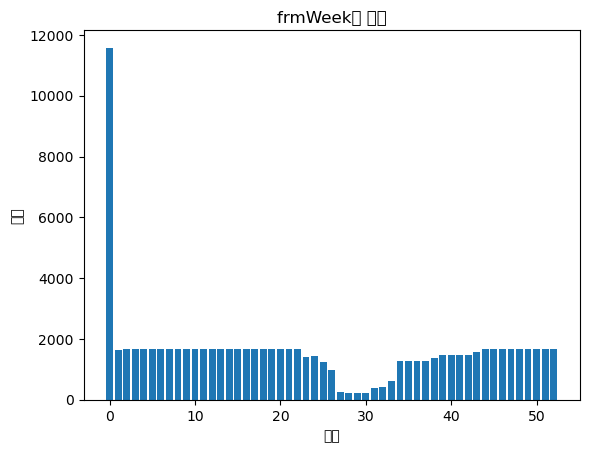

In [45]:
import numpy as np
import matplotlib.pyplot as plt

plt.bar(week.index, week['count'], label='dd')
plt.title("frmWeek별 갯수")
plt.xlabel('주차')
plt.ylabel('갯수')
plt.show()

 frmWeek는 0주차인 데이터가 11580개 존재    -> 대체할 수 있는 대체값 찾아보기
--------


In [46]:
data[data['frmWeek'] == 36][['date','frmWeek']]['date'].value_counts()

date
20170904    150
20170905    150
20170906    150
20170907    150
20170908    150
20170909    150
20170910    150
20180903     30
20180904     30
20180905     30
20180906     30
20180907     30
20180908     30
20180909     30
Name: count, dtype: int64

> 20170821 ~ 20170827 : 34주차    
> 20170828 ~ 20170903 : 35주차       
> 20170904 ~ 20170910 : 36주차

> 20180820 ~ 20180826 : 34주차      
> 20180827 ~ 20180902 : 35주차    
> 20180903 ~ 20180909 : 36주차

In [47]:
dates = data['date'].values
data['weeks'] = 0

for i, date in enumerate(data['date']):
    print("date : ", date)
    date = pd.to_datetime(date, format='%Y%m%d')

    week_number = date.isocalendar().week

    print(week_number)
    data.at[i, 'weeks'] = week_number # 'weeks' 열에 주 번호 저장
    # data['weeks'] = week_number

data[['date', 'frmWeek', 'weeks']]


date :  20220926
39
date :  20221001
39
date :  20221002
39
date :  20221003
40
date :  20221004
40
date :  20221005
40
date :  20221006
40
date :  20221007
40
date :  20221008
40
date :  20221009
40
date :  20221010
41
date :  20221011
41
date :  20221012
41
date :  20221013
41
date :  20221014
41
date :  20221015
41
date :  20221016
41
date :  20221017
42
date :  20221018
42
date :  20221019
42
date :  20221020
42
date :  20221021
42
date :  20221022
42
date :  20221023
42
date :  20221024
43
date :  20221025
43
date :  20221026
43
date :  20221027
43
date :  20221028
43
date :  20221029
43
date :  20221030
43
date :  20221031
44
date :  20221101
44
date :  20221102
44
date :  20221103
44
date :  20221104
44
date :  20221105
44
date :  20221106
44
date :  20221107
45
date :  20221108
45
date :  20221109
45
date :  20221110
45
date :  20221111
45
date :  20221112
45
date :  20221113
45
date :  20221114
46
date :  20221115
46
date :  20221116
46
date :  20221117
46
date :  20221118
46


18
date :  20180501
18
date :  20180502
18
date :  20180503
18
date :  20180504
18
date :  20180505
18
date :  20180506
18
date :  20180507
19
date :  20180508
19
date :  20180509
19
date :  20180510
19
date :  20180511
19
date :  20180512
19
date :  20180513
19
date :  20180514
20
date :  20180515
20
date :  20180516
20
date :  20180517
20
date :  20180518
20
date :  20180519
20
date :  20180520
20
date :  20180521
21
date :  20180522
21
date :  20180523
21
date :  20180524
21
date :  20180525
21
date :  20180526
21
date :  20180527
21
date :  20180528
22
date :  20180529
22
date :  20180530
22
date :  20180531
22
date :  20180601
22
date :  20180602
22
date :  20180603
22
date :  20180604
23
date :  20180605
23
date :  20180606
23
date :  20180607
23
date :  20180608
23
date :  20180609
23
date :  20180610
23
date :  20180611
24
date :  20180612
24
date :  20180613
24
date :  20180614
24
date :  20180615
24
date :  20180616
24
date :  20180617
24
date :  20180618
25
date :  20180619


,date,frmWeek,weeks
0,20220926,0,39
1,20221001,0,39
2,20221002,0,39
3,20221003,0,40
4,20221004,0,40
...,...,...,...
84835,20180710,0,28
84836,20180711,0,28
84837,20180712,0,28
84838,20180713,0,28


In [48]:
# data[data['frmWeek'] == 35][['frmWeek', 'weeks']].value_counts()
data[data['frmWeek'] == 37][['frmWeek', 'weeks']].value_counts()

frmWeek  weeks
37       37       1260
Name: count, dtype: int64

In [49]:
data[['date', 'frmWeek']]

,date,frmWeek
0,20220926,0
1,20221001,0
2,20221002,0
3,20221003,0
4,20221004,0
...,...,...
84835,20180710,0
84836,20180711,0
84837,20180712,0
84838,20180713,0


In [50]:
data['frmWeek'] = data['weeks']
data = data.drop(columns=['weeks'])
data.head()


,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
0,DBSF1059,20220926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
1,DBSF1059,20221001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1347.554178,202.133127,4711.308821,5936.249114,0.000000,0.0000,190.168990,2221.173803,0.0
2,DBSF1059,20221002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,69.899353,10.484903,271.379890,341.938662,0.000000,0.0000,0.000000,0.000000,0.0
3,DBSF1059,20221003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,412.225065,61.833760,1539.505534,1939.776973,253.744916,149.7095,0.000000,0.000000,0.0
4,DBSF1059,20221004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,590.608634,88.591295,2614.973165,3294.866187,3032.885084,1789.4022,1.149739,13.428955,0.0


In [51]:
# inTp, inHd, acSlrdQy 컬럼이 모두 0인 행 제거
input_data = data[~((data['inTp'] == 0) & (data['inHd'] == 0) & (data['acSlrdQy'] == 0))]

# 인덱스 재설정
input_data = input_data.reset_index(drop=True)

In [52]:
data1 = data
data1



,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
0,DBSF1059,20220926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
1,DBSF1059,20221001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1347.554178,202.133127,4711.308821,5936.249114,0.000000,0.0000,190.168990,2221.173803,0.0
2,DBSF1059,20221002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,69.899353,10.484903,271.379890,341.938662,0.000000,0.0000,0.000000,0.000000,0.0
3,DBSF1059,20221003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,412.225065,61.833760,1539.505534,1939.776973,253.744916,149.7095,0.000000,0.000000,0.0
4,DBSF1059,20221004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,590.608634,88.591295,2614.973165,3294.866187,3032.885084,1789.4022,1.149739,13.428955,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84835,DBSF9969,20180710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,235272.042536,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
84836,DBSF9969,20180711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,227947.124946,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
84837,DBSF9969,20180712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,231527.426327,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
84838,DBSF9969,20180713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,251254.321635,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0


In [53]:
# input_cols =['otmsuplyqy','acSlrdQy', 'cunt',
#        'ph', 'outTp', 'outWs', 'daysuplyqy']
# input_cols =['inTp','inHd','otmsuplyqy', 'acSlrdQy', 
#        'ph', 'outTp', 'outWs', 'inCo2', 'ec',
#        'frmWeek', 'frtstGrupp', 
#        'flanGrupp', 'frtstCo', 'tcdmt', 'frmhsFclu', 'hvstGrupp',
#        'grwtLt', 'fcluHg', 'lefLt', 'hvstCo', 'lefCunt',
#        'lefBt', 'stemThck', 'frmAr', 'frmDov',
#        'WaterUsage', 'WaterCost', 'FertilizerUsage', 'FertilizerCost',
#        'CO2Usage', 'CO2Cost', 'MistUsageTime', 'Mist Cost']

input_cols =['cunt','frmAr', 'hvstGrupp', 'acSlrdQy',  'WaterUsage', 'WaterCost',
             'FertilizerUsage', 'FertilizerCost', 'date','outTp','outWs','otmsuplyqy']

output_cols = ['outtrn_cumsum', 'HeatingEnergyUsage_cumsum']
training_table = data1.loc[:,input_cols]
target_table= data1.loc[:,output_cols]

In [54]:


def colored_text(text, color='default', bold=False):
        '''
        #### 예시 사용법
        print(colored_text('저장 하지 않습니다.', 'red'))
        print(colored_text('저장 합니다.', 'green'))
        default,red,green,yellow,blue, magenta, cyan, white, rest
        '''
        colors = {
            'default': '\033[99m',
            'red': '\033[91m',
            'green': '\033[92m',
            'yellow': '\033[93m',
            'blue': '\033[94m',
            'magenta': '\033[95m', #보라색
            'cyan': '\033[96m',
            'white': '\033[97m',
            'bright_black': '\033[90m',  # 밝은 검정색 (회색)
            'bright_red': '\033[91m',  # 밝은 빨간색
            'bright_green': '\033[92m',  # 밝은 초록색
            'bright_yellow': '\033[93m',  # 밝은 노란색
            'bright_blue': '\033[94m',  # 밝은 파란색
            'bright_magenta': '\033[95m',  # 밝은 보라색
            'bright_cyan': '\033[96m',  # 밝은 청록색
            'bright_white': '\033[97m',  # 밝은 흰색
            'reset': '\033[0m'
        }
        color_code = colors.get(color, colors['default'])
        bold_code = '\033[1m' if bold else ''
        reset_code = colors['reset']
        
        return f"{bold_code}{color_code}{text}{reset_code}"
def blue(str):return colored_text(str,'blue')
def yellow(str):return colored_text(str,'yellow',bold=True)
def red(str):return colored_text(str,'red',bold=True)
def green(str):return colored_text(str,'green',bold=True)
def magenta(str):return colored_text(str,'magenta')
def Explaination(title,explain):
    title =str(title).upper()
    print(colored_text(f"___ 🟡 {title}. ",'green',bold=True))
    print(colored_text(f"______ 📌 {explain}",'yellow'))


In [55]:
data1.shape

(84840, 47)

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score




# 예시 데이터 (training_table과 target_table이 이미 존재한다고 가정)
# training_table = pd.DataFrame(...)
# target_table = pd.DataFrame(...)

# 데이터 분할
train_input, test_input, train_target, test_target = \
    train_test_split(training_table,
                     target_table, 
                     test_size=0.2,
                     random_state=42)
def real_pred_compare(predictions,test_target,test_input):
    print(yellow("🔸🔸🔸🔸🔸🔸[[실제 예측값 확인]]🔸🔸🔸🔸🔸🔸"))
    for idx,(pred_result,real,test_in) in enumerate(zip(predictions,test_target.values,test_input.values)):
        if idx < 4:
            str_real = "\t"
            str_pred = "\t"
            str_input = "\t"
            for i in list(real):
                str_real = "\t".join("{:>8d}".format(int(val)) for val in real)
            for j in list(map(int,(pred_result))):
                str_pred = "\t".join("{:>8d}".format(int(val)) for val in pred_result)
            for k in list(test_in):
                str_input += str(k) + "\t"

            
            print(f"***** {idx} 번째 test 결과 ***** ")
            print("인풋 정보"+"---"*200)
            print(f"인풋칼럼","\t".join((list(test_input.columns))),sep = "\t\t")
            print(f"***인풋\t  {str_input}", sep='\t')
            print("아웃풋 정보"+"---"*200)
            print(f"  ","\t".join((list(test_target.columns))),sep = "\t\t")
            formatted_columns = "\t".join("{:>8s}".format(col) for col in list(test_target.columns))
            print(f"    \t{formatted_columns}")
            print(f"실제\t  {str_real}", sep='\t')
            print(f"예측\t  {str_pred}", sep='\t')



def linear_regressor_prdict():
    ## Linear Regression model 비교
    lin_regressor = LinearRegression()
    multi_output_regressor_lin = MultiOutputRegressor(lin_regressor)
    multi_output_regressor_lin.fit(train_input, train_target)
    y_pred_lin = multi_output_regressor_lin.predict(test_input)
    mse = mean_squared_error(test_target, y_pred_lin)
    rmse = np.sqrt(mse)
    r2 = r2_score(test_target, y_pred_lin) 
    
    #### 교차검증 
    scores_cv = cross_val_score(multi_output_regressor_lin,train_input,train_target,scoring='neg_mean_squared_error',cv=10)
    rmse_cv = np.sqrt(-scores_cv)
    print(f"Linear regression model RMSE: {rmse:.2f}")
    print(f"Linear regression model R2 score: {r2:.2f}")
    print("\t ",f"LR cv score : {rmse_cv}")
    print("\t ",f"LR cv RMSE  average : {rmse_cv.mean():.2f}")
    predictions = multi_output_regressor_lin.predict(test_input)
    real_pred_compare(predictions,test_target,test_input)
linear_regressor_prdict()
def knn_regressor_predict():
    ## KNN regression model
    knn_regressor = KNeighborsRegressor(n_neighbors=3)
    ## Multi Output Setting
    multi_output_regressor_knn = MultiOutputRegressor(knn_regressor)
    multi_output_regressor_knn.fit(train_input, train_target)

    score = multi_output_regressor_knn.score(test_input, test_target)
    y_pred_knn = multi_output_regressor_knn.predict(test_input)
    mse = mean_squared_error(test_target, y_pred_knn)
    rmse = np.sqrt(mse)
    # R2 스코어 계산
    r2 = r2_score(test_target, y_pred_knn)
    print(yellow(f'KNN(3) regression model score: {score}'))
    print(f'KNN(3) regression model RMSE: {rmse:.2f}')
    print(f'KNN regression model R2 score: {r2:.2f}')
    #### 교차검증 
    scores_cv = cross_val_score(multi_output_regressor_knn,train_input,train_target,scoring='neg_mean_squared_error',cv=10)
    rmse_cv = np.sqrt(-scores_cv)
    print("\t ",f"KNN cv score : {rmse_cv}")
    print("\t ",f"KNN cv RMSE average : {rmse_cv.mean():.2f}")
    predictions = multi_output_regressor_knn.predict(test_input)

    real_pred_compare(predictions,test_target,test_input)

    
    
    
knn_regressor_predict()

def xgboost_regressor_predict():
    xg_reg = XGBRegressor()
    multi_output_regressor_xg = MultiOutputRegressor(xg_reg)
    multi_output_regressor_xg.fit(train_input, train_target)

    score = multi_output_regressor_xg.score(test_input, test_target)
    y_pred_xg = multi_output_regressor_xg.predict(test_input)
    mse = mean_squared_error(test_target, y_pred_xg)
    rmse = np.sqrt(mse)
    # R2 스코어 계산
    r2 = r2_score(test_target, y_pred_xg)
    print(yellow(f'XGB regression model score: {score}'))
    print(f'XGBoost(3) regression model RMSE: {rmse:.2f}')
    print(f'XGBoost regression model R2 score: {r2:.2f}')
    ### 교찯검증
    scores_cv = cross_val_score(multi_output_regressor_xg,train_input,train_target,scoring='neg_mean_squared_error',cv=10)
    rmse_cv = np.sqrt(-scores_cv)
    print("\t ",f"XGB cv score : {rmse_cv}")
    print("\t ",f"XGB cv RMSE average : {rmse_cv.mean():.2f}")
    predictions = multi_output_regressor_xg.predict(test_input)
    real_pred_compare(predictions,test_target,test_input)
xgboost_regressor_predict()

def randomforest_regressor_predict():
    rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
    multi_output_regressor_rf = MultiOutputRegressor(rf_reg)
    multi_output_regressor_rf.fit(train_input, train_target)

    y_pred_rf = multi_output_regressor_rf.predict(test_input)
    mse = mean_squared_error(test_target, y_pred_rf)
    rmse = np.sqrt(mse)
    r2 = r2_score(test_target, y_pred_rf)

    print(yellow(f'RandomForest regression model RMSE: {rmse:.2f}'))
    print(f'RandomForest regression model R2 score: {r2:.2f}')

    # 교차 검증
    scores_cv = cross_val_score(multi_output_regressor_rf, train_input, train_target, 
                                scoring='neg_mean_squared_error', cv=10)
    rmse_cv = np.sqrt(-scores_cv)
    print("\t ", red(f"RF cv RMSE scores: {rmse_cv}"))
    print("\t ", green(f"RF cv RMSE average: {rmse_cv.mean():.2f}"))

    # R2 교차 검증
    r2_scores_cv = cross_val_score(multi_output_regressor_rf, train_input, train_target, 
                                   scoring='r2', cv=10)
    print("\t ", red(f"RF cv R2 scores: {r2_scores_cv}"))
    print("\t ", green(f"RF cv R2 average: {r2_scores_cv.mean():.2f}"))

    predictions = multi_output_regressor_rf.predict(test_input)
    real_pred_compare(predictions, test_target, test_input)

randomforest_regressor_predict()

Linear regression model RMSE: 254034.24
Linear regression model R2 score: 0.49
	  LR cv score : [242579.99115245 241354.84920166 242991.72326877 244907.93201092
 247876.5903059  247187.60762924 248994.43272687 244210.17445875
 261199.93385033 248432.48081555]
	  LR cv RMSE  average : 246973.57
🔸🔸🔸🔸🔸🔸[[실제 예측값 확인]]🔸🔸🔸🔸🔸🔸
***** 0 번째 test 결과 ***** 
인풋 정보------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
인풋칼럼		cunt	frmAr	hvstGrupp	acSlrdQy	WaterUsage	

KNN(3) regression model score: 0.7430711614546781
KNN(3) regression model RMSE: 184183.53
KNN regression model R2 score: 0.74
	  KNN cv score : [172506.53391586 183698.14104564 187871.44216869 196620.17137135
 202190.77301509 189093.8804703  201901.99488898 191351.27764116
 208628.23873762 185045.96468074]
	  KNN cv RMSE average : 191890.84
🔸🔸🔸🔸🔸🔸[[실제 예측값 확인]]🔸🔸🔸🔸🔸🔸
***** 0 번째 test 결과 ***** 
인풋 정보------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------